In [1]:
import pandas as pd

table_for_algo = pd.read_csv("/home/sai/Documents/repos_and_projects/personal_projects/tsai_projects/"
                             "assignment12_tinyImagenet/clustering_input.csv")

In [3]:
table_for_algo["bb_width_n"] = table_for_algo["bb_width"] / table_for_algo["img_width"]
table_for_algo["bb_height_n"] = table_for_algo["bb_height"] / table_for_algo["img_height"]
table_for_algo = table_for_algo[["bb_width_n", "bb_height_n"]]

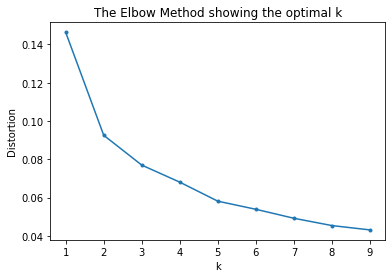

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt



# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(table_for_algo)
    kmeanModel.fit(table_for_algo)
    distortions.append(sum(np.min(cdist(table_for_algo, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /table_for_algo.shape[0])

# Plot the elbow
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 5 CLUSTERS